# WeatherPy
----

In [31]:
# Import dependencies, api key, and create an output file for the cities.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from api_keys import weather_api_key
from citipy import citipy

output_data_file = "output_data/cities.csv"

# Sets the range of latitude and longitude for cities.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Data Observations

I put some general observations under each data plot as I commented what the lines were showing. However, I have summarized this at a top lovel in this section.

## First Observation

The first and largest observation I found interesting was that there was less of a correlation with latitude than I first expected. As the plots demonstrate, I found hotels which matched the ideal weather conditions in a wide range of latitudes and longitudes. This is too small of a sample size to make definitive conclusions. I believe that there is some correlation between ideal weather and latitudes. However, from my data it appears that other geographical features may play a larger roll such as proximity to oceans, mountains and other features which impact the data. There were a large number of hotels (though not all) near the ocean which fit the ideal weather conditions. Ocean proximity may be more indicative than latitude, but that is a hypothesis. 

## Second Observation

The largest correlation with latitude and weather conditions by far was temperature. As both the southern and northern graphs shows there is a strong linear relationship between temperature and latitude. This follows simple common sense that weather gets cooler as distance from the equator increases. However, even here there is an interesting difference between the Northern and Southern hemispheres. The southern hemisphere has a strong linera relationship between equator distance and temperature. However, in the northern hemisphere there seems to be a large bump about 10 degrees north of the equator and then the data moves into a stronger linear relationship like the southern data. My working hypothesis for this phenomenon is to look at the land mass differences. The real outlier here is the Sahara desert and Middle East. There is also a large difference in landmass. The northern hemisphere is about 40% landmass and 60% ocean whereas the southern hemisphere is 20% landmass and 80% ocean. While much of Australia is dessert, the southern hemisphere simply does not have the same range and distribution of desert as the northern does. Thus these geographic differences show up in the data in that the correlations between latitude and heat are impacted by other geographical features which give them their unique distributions.

## Third Observation

The final general observation was a bit surprising to me in that besides temperature, there was far less correlation between latitude and the factors of cloudiness and humidity. Wind speed had a small marign of increase as distance moved away from the equator. Even more interesting, in the northern hemisphere there was as small decrease in humidity as distance moved away from the equator while there was virtually no correlation in the southern hemisphere. There probably is more of a correlation, but the relatively small landmass size of South America, whose climate and humidity is significantly impacted by the Andes mountains as well as the greater likelihood of proximity to the ocean for a random city in the southern hemisphere are probably what are impacting this correlation. I could list out observations for many of the other data points. But in general, this showed me that while there were some correlations between latitude as a general metric, understanding the spefic landmass and features of hemispheres, ocean proximity and other factors probably play an even more decisive roll in determining local weather conditions. 

## Generate Cities List

In [32]:
# Create two empty lists to hold randomly generated coordinates and cities.
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Check if the list of cities is more than 500.
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
# This code uses a for loop to combine our base url with the coordinates of thi cities to create a query search.
# The code then uses a query count using a simple incrementer to have a print log. The try and except functions try the 
# query, but if there is an error the pass function is given with an error print statement. I decided to build me lists by a simple
# append function to an empty list called city_weather, although there are other ways to perform that function. I saw that the hw broke down
# the quiries into different sets. I was unclear of the need to do it in multiple sets, so just used an incrementer to have the total query count
# under one set.

url = "http://api.openweathermap.org/data/2.5/weather?"

city_weather = []
query_count = 0

for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    query_count += 1
    
    try:
        city_weather.append(weather_json)
        print(f"Processing record {query_count} of Set 1 | {weather_json['name']}")
    except:
        print("City not found. Skipping...")
        pass

Processing record 1 of Set 1 | Butaritari
Processing record 2 of Set 1 | Albany
Processing record 3 of Set 1 | Port Elizabeth
Processing record 4 of Set 1 | Ushuaia
City not found. Skipping...
Processing record 6 of Set 1 | Rikitea
Processing record 7 of Set 1 | Port Alfred
Processing record 8 of Set 1 | Saskylakh
Processing record 9 of Set 1 | Avarua
Processing record 10 of Set 1 | Hithadhoo
Processing record 11 of Set 1 | Klyuchevskiy
Processing record 12 of Set 1 | Saint-Philippe
Processing record 13 of Set 1 | Torbay
Processing record 14 of Set 1 | Meulaboh
Processing record 15 of Set 1 | Sibolga
Processing record 16 of Set 1 | Soe
Processing record 17 of Set 1 | Thinadhoo
Processing record 18 of Set 1 | Auki
Processing record 19 of Set 1 | Lavrentiya
Processing record 20 of Set 1 | Tuktoyaktuk
Processing record 21 of Set 1 | Hilo
Processing record 22 of Set 1 | Mataura
Processing record 23 of Set 1 | Blyth
Processing record 24 of Set 1 | Bredasdorp
Processing record 25 of Set 1 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# I came across json_normalize, which feels like cheating because it is so easy to manipulate a list of json files into a dataframe directly. Json_normalize is built precisely to deal 
# with nested dictionaries like the one in my output. So it was nice to see that functionality directly relevant to a real world example.
# To save myself some time I formatted the dataframe they way I wanted and then exported to csv so I wouldn't have to reformat the csv. 

weather_df = pd.json_normalize(city_weather)
weather_df.drop(weather_df[weather_df['message'] == 'city not found'].index, inplace = True)
weather_df.drop(columns=['weather', 'base', 'timezone', 'id', 'sys.type', 'main.sea_level', 'visibility', 'sys.sunrise', 'sys.sunset', 'main.pressure', 'rain.1h', 'main.grnd_level', 'wind.gust', 
                         'main.feels_like', 'main.temp_min', 'wind.deg', 'sys.id', 'message', 'wind.gust', 'main.sea_level', 'cod', 'main.temp'], inplace=True)
weather_df.head()

,dt,name,coord.lon,coord.lat,main.temp_max,main.humidity,wind.speed,clouds.all,sys.country
0,1.595385e+09,Butaritari,172.79,3.07,82.58,71.0,8.34,54.0,KI
1,1.595385e+09,Albany,-73.97,42.60,72.00,58.0,3.27,41.0,US
2,1.595385e+09,Port Elizabeth,25.57,-33.92,60.80,59.0,17.22,0.0,ZA
3,1.595385e+09,Ushuaia,-68.30,-54.80,32.00,83.0,3.36,0.0,AR
5,1.595385e+09,Rikitea,-134.97,-23.12,66.31,62.0,17.92,0.0,PF


In [69]:
# I simply need to convert units and rename my column to finish my dataframe and the export it to csv.
weather_df.columns = ['Date', 'City', 'Longitude', 'Latitude', 'Max Temp', 'Humidity', 'Wind Speed', 'Cloudiness', 'Country']
weather_df

# Convert Unixtime stame to Datetime - this isn't really important since the datestamp is simply the date and time of the api query, but good practice nonetheless.
# "unit='s'" converts the time to standard.
weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s').reset_index(drop=True)
weather_df.head()

# Finally, I save my dataframe into a csv using df.to_csv(). to_csv adds an extra index which is redundant so I set index=False to remove that.
weather_df.to_csv('city_weather.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [36]:
# There happened to be no cities above 100% humidity in my database, but I put the code to drop in the comments belove. You can get the index directly from the loc function and drop all in 
# one line of code. The print statement just prints the name of any city with abouv 100% humidity, but because the list is empty there are no cities that meet that criteria.

print(weather_df.loc[weather_df['Humidity'] > 100, :]['City'])

# Code to drop above 100% humidity cities
# weather_df.drop(weather_df[weather_df['Humidity'] > 100].index, inplace = True)

Series([], Name: City, dtype: object)


## Latitude vs. Temperature Plot

In [120]:
# I defined a function to plot called plot_function. The 5 variables two variables for the two metrics to be plotted against each other and then title and axis names
# for the plots. I also have plt.savefig with a formatted string to save each chart as a png.

def plot_function(var_a, var_b, title_name, xlabel, ylabel):
    ax = weather_df.plot(kind='scatter', x= var_a, y= var_b, fontsize= 14, grid=True, c='Darkblue')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.title(f"{title_name}, date of analysis: {weather_df.iloc[0,0]}", fontsize= 20)
    plt.savefig(f"{title_name}.png")
    return ax.plot()

## Latitude vs. Humidity Plot

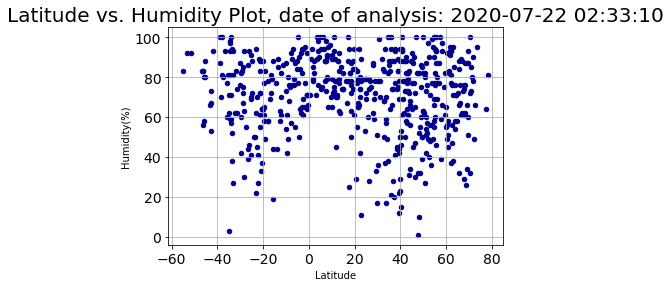

In [121]:
plot_function('Latitude', 'Humidity', "Latitude vs. Humidity Plot", "Latitude", "Humidity(%)");

# This plot examines the relationship between latitude and humidity. As a general note for all plots, there should be some symmetry between latitudes of equal
# dimension from the equator because there is some symetrical weather relationship between latitudes equidistant north and south of the equator. However, the ocean
# streams, such as the gulf stream and other geographic features such as landmass also play a difference. For instance, without the rocky mountains some geologists
# argue that the midwest would actually be a desert since there would be far less rainfull. Thus in this first graph there is some correlation between latitude
# north and south of the equator, yet there is also considerable variance because latitude is not the only factor in weather conditions.

## Latitude vs. Cloudiness Plot

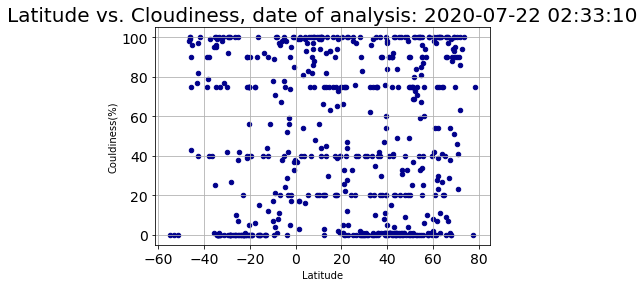

In [122]:
plot_function('Latitude', 'Cloudiness', 'Latitude vs. Cloudiness', 'Latitude', 'Couldiness(%)');

# This plot correlates latitude with cloudiness which appears to have even less correlation than humidity does to latitude for the reasons mentioned above because
# cloudiness is more effected by rain and the jetstream than pure latitude. 

## Latitude vs. Wind Speed Plot

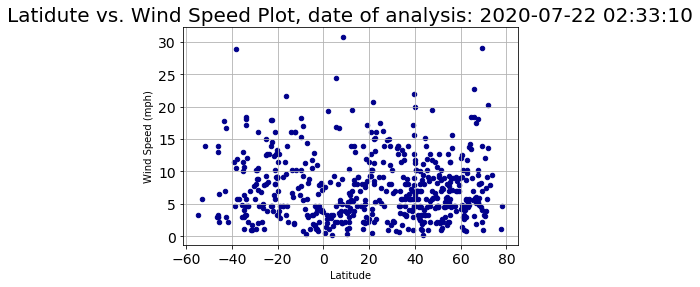

In [123]:
plot_function('Latitude', 'Wind Speed', 'Latidute vs. Wind Speed Plot', 'Latitude', 'Wind Speed (mph)');
# This chart looks at the difference in wind speed versus latitude to assess how latitude impacts the weather. Although weather travels West to East, there appears to
# not be much of a correlation in this plot as well. Humidity, although slightly, appears to have the most direct relationship with latitude. My guess is that if we
# binned the data we might be able to identify places where the jetstream, or trade winds blow, but a larger sample size greater than n ~ 500 would be needed.

## Linear Regression

In [144]:
# The following code is my function to calculate weather regression for each of the variables charted above. The data_source variable is introduced to be able
# to plug in the Northern and Souther data sets which I calculate below.
# There were two graphical errors I was not able to resolve in my plot. I noticed that even though the function was the same I was not able to get the annotated
# regression line to appear for each graph. That appeared to be a pyplot/matplotlib specific thing where it would show for some plots and not others. 
# I printed the regression line for each plot to have it. Also, pyplot seeme to not like the lengthy titles due to putting the date of analysis in the title. 
# I probably could have resolved that by putting both the regression and date of analysis in a separate legend or other box. As a work around I probably could 
# have done a text box using plt.text and put the regression line and analysis date in there to look cleaner. This example from matplotlib shows how to do that easily:
# https://matplotlib.org/3.1.1/gallery/recipes/placing_text_boxes.html

def weather_regress(data_source, var_a, var_b, chart_title, x_name, y_name):
    x_values = data_source[var_a]
    y_values = data_source[var_b]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (6,10),fontsize=15, color="red")
    plt.title(f"{chart_title}, date of analysis: {weather_df.iloc[0,0]}", fontsize= 20)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.savefig(f"{chart_title}.png")
    print(f"The r-squared is: {rvalue**2} and the regression line is {line_eq}")
    return plt.show()
    

In [145]:
# A basic loc functions separates the cities by their latitude north and south of the equator.
northern_weather = weather_df.loc[weather_df['Latitude'] > 0]
southern_weather = weather_df.loc[weather_df['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4248311049451223 and the regression line is y = -0.41x + 86.86


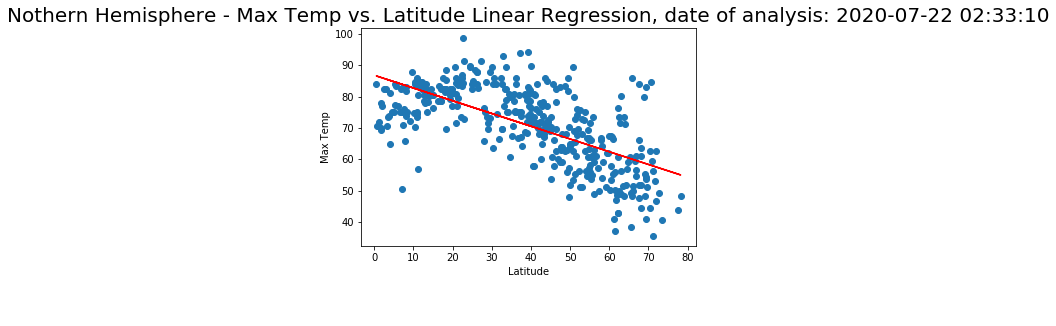

In [146]:
weather_regress(northern_weather, 'Latitude', 'Max Temp', 'Nothern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp')

# There is a strong linear correlation betwene latitude and temperature. However, three is an interesting variance between the southern and nothern plots which I explain
# in my general observations. Several nothern hemisphere landmassess appear to create a bump in the more general linear regression. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5787776627684772 and the regression line is y = 0.78x + 79.91


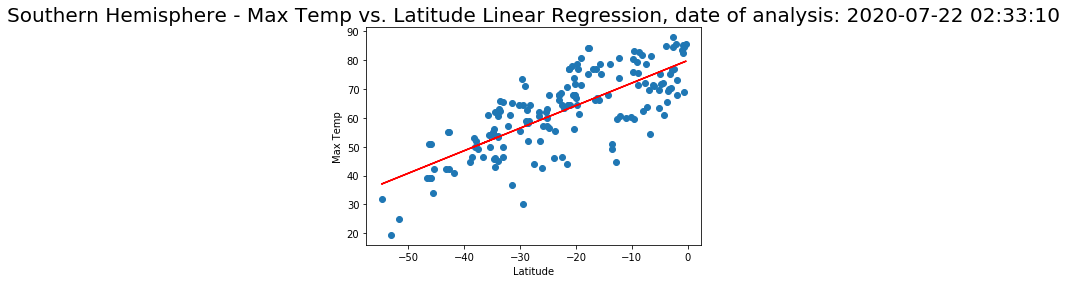

In [147]:
weather_regress(southern_weather, 'Latitude', 'Max Temp', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression', 'Latitude', 'Max Temp')
# Due to smaller landmass size there is a strong linear correlation in the southern hemisphere where temperature increases the closer one gets to the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.031182005238432908 and the regression line is y = -0.18x + 77.9


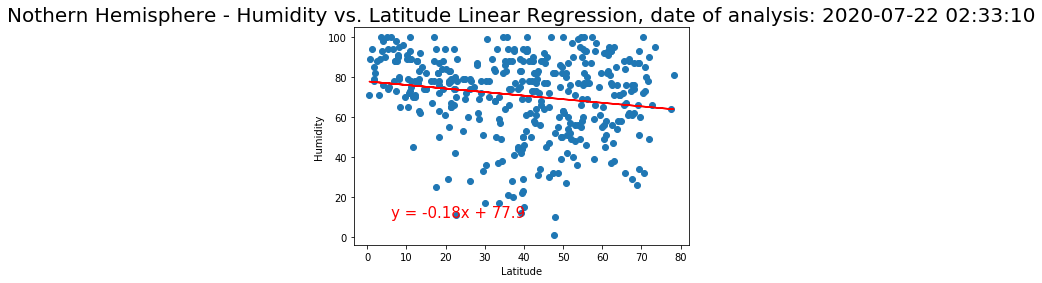

In [148]:
weather_regress(northern_weather, 'Latitude', 'Humidity', 'Nothern Hemisphere - Humidity vs. Latitude Linear Regression', 'Latitude', 'Humidity')

# This maps the correlation between humidity and latitude in the northern hemisphere. As can be seen there is small correlation if any. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00028351048093069365 and the regression line is y = -0.02x + 70.23


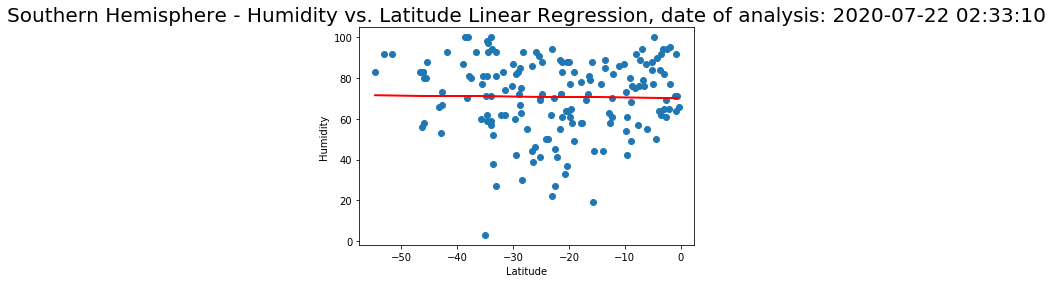

In [149]:
weather_regress(southern_weather, 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Linear Regression', 'Latitude', 'Humidity')

# This chart maps out humitity as latitude changes from the equator in the southern hemisphere. As can be seen there is small correlation if any. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0028215285978739927 and the regression line is y = -0.1x + 53.19


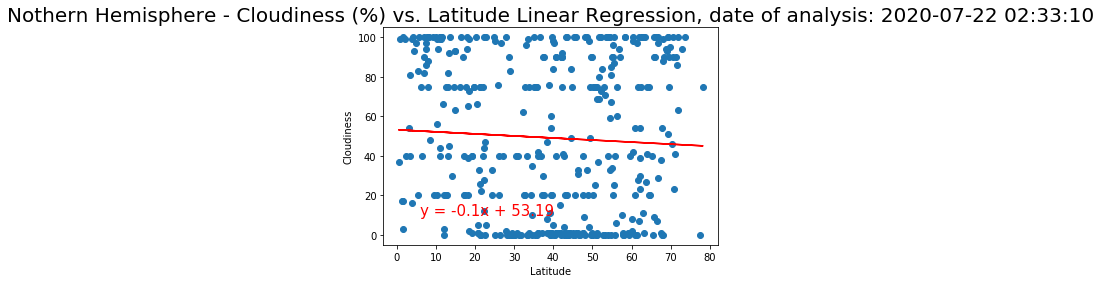

In [150]:
weather_regress(northern_weather, 'Latitude', 'Cloudiness', 'Nothern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Latitude', 'Cloudiness')

# This chart maps out cloudiness as latitude changes from the equator in the northern hemisphere. There is basically no demonstrable correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0034246248207911367 and the regression line is y = -0.18x + 40.7


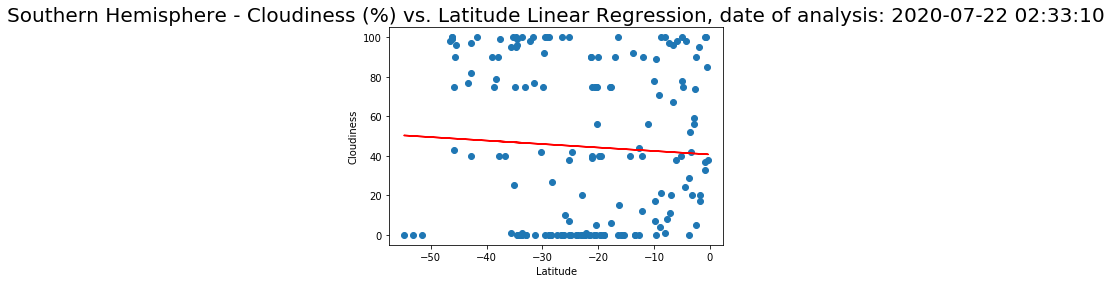

In [151]:
weather_regress(southern_weather, 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression', 'Latitude', 'Cloudiness')
# This chart maps out cloudiness as latitude changes from the equator in the southern hemisphere. There is alot of variance which suggests other factors play a more
# significant influence.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.001826225087035554 and the regression line is y = 0.01x + 6.81


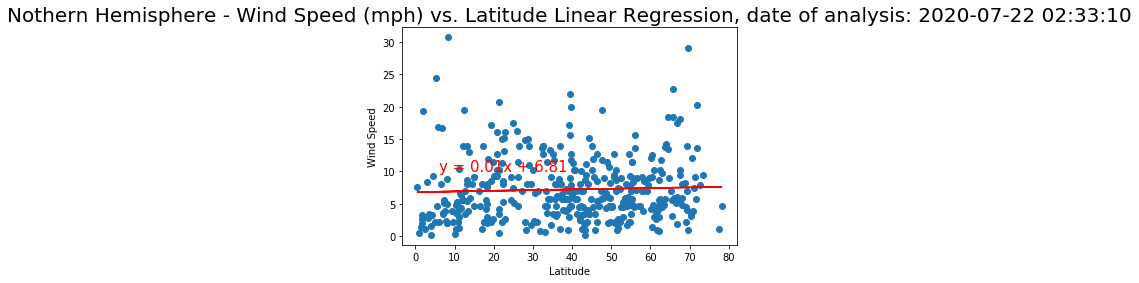

In [152]:
weather_regress(northern_weather, 'Latitude', 'Wind Speed', 'Nothern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Latitude', 'Wind Speed')
# This chart maps the correlation between wind speed and latitude. Once again with a small sample size there appears to be no correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008547649193862136 and the regression line is y = -0.04x + 7.0


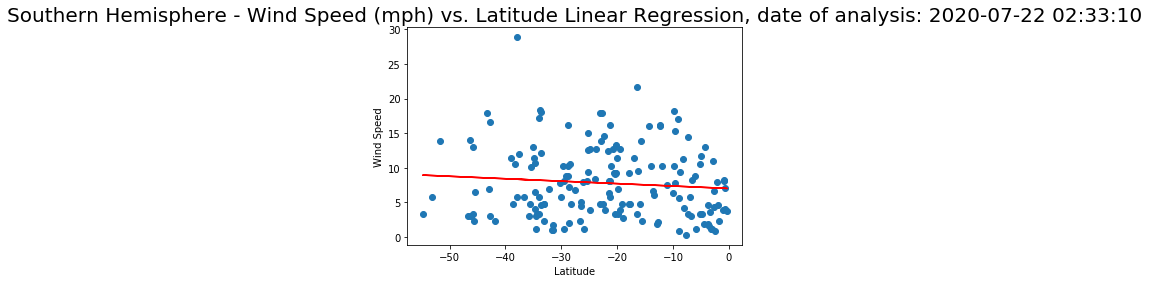

In [153]:
weather_regress(southern_weather, 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression', 'Latitude', 'Wind Speed')
# This chart maps the correlation between wind speed and latitude in the southern hemipshere. Once again with a small sample size there appears to be no correlation. 